In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

In [7]:
sys.path.append(os.path.abspath('..')) 
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/processed/'))

latent_rep_path = os.path.join(base_dir, 'latent_representation.csv')
latent_rep = pd.read_csv(latent_rep_path)

,customer_id,latent_0,latent_1,latent_2,latent_3
0,39634,15.020411,2.769545,3.907955,5.697288
1,43460,13.087861,3.464425,7.367911,3.408769
2,23937,14.223924,7.504026,6.952682,3.125140
3,2431,14.875112,8.457269,9.916911,1.112621
4,10090,11.901017,3.465671,0.000000,2.725487


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(latent_rep)

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(latent_rep)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
latent_rep.head()

,customer_id,latent_0,latent_1,latent_2,latent_3
0,39634,15.020411,2.769545,3.907955,5.697288
1,43460,13.087861,3.464425,7.367911,3.408769
2,23937,14.223924,7.504026,6.952682,3.125140
3,2431,14.875112,8.457269,9.916911,1.112621
4,10090,11.901017,3.465671,0.000000,2.725487


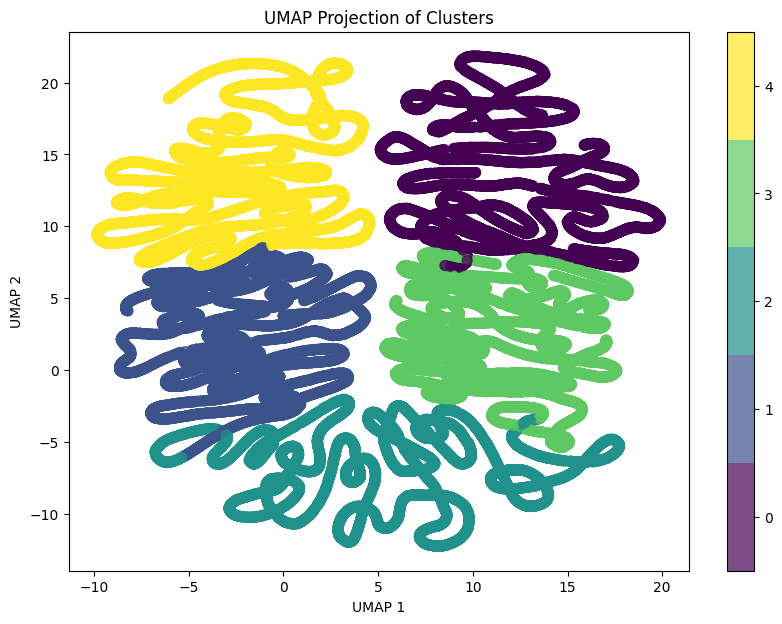

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))
plt.title('UMAP Projection of Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()